# Thyroid Disease Detection

##### Life cycle of Thyroid disease Detector
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data preprocessing
- Model Training
- Choose best model

## 1) Problem Statement

- Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.


## 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/102/thyroid+disease
- From Garavan Institute
- Documentation: as given by Ross Quinlan
- 6 databases from the Garavan Institute in Sydney, Australia
- Approximately the following for each database:

    ** 2800 training (data) instances and 972 test instances
    ** Plenty of missing data
    ** 29 or so attributes, either Boolean or continuously-valued 

- 2 additional databases, also from Ross Quinlan, are also here

    ** Hypothyroid.data and sick-euthyroid.data
    ** Quinlan believes that these databases have been corrupted
    ** Their format is highly similar to the other databases 

- A Thyroid database suited for training ANNs

    ** 3 classes
    ** 3772 training instances, 3428 testing instances
    ** Includes cost data (donated by Peter Turney) 

### 2.1 Import Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn, regular expression and Os Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import re

### Setting DataFrame max Rows and Columns view
- Maximum columns: 5000
- Maximum rows: All

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10000)

In [3]:
final_dataset=pd.read_csv('blended_data.csv')

## 5) Datachecks to performs

- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 5.1 Checking Missing values

In [4]:
final_dataset.isnull().sum()

age                             2
sex                           300
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           738
T3_measured                     0
T3                           1538
TT4_measured                    0
TT4                           462
T4U_measured                    0
T4U                           774
FTI_measured                    0
FTI                           770
TBG_measured                    0
TBG                          7544
referral_source                 0
disease       

#### Missing values in dataset
- age --> 450
- sex --> 930
- I131_treatment --> 3163
- hypopituitary --> 3163
- psych --> 3163
- TSH --> 2730
- T3 --> 6224
- TT4 --> 1611
- T4U --> 2542
- FTI --> 2542
- TBG --> 25726
- referral_source --> 3163

### 5.2 Checking datatypes

In [5]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        7542 non-null   float64
 1   sex                        7244 non-null   object 
 2   on_thyroxine               7544 non-null   int64  
 3   query_on_thyroxine         7544 non-null   int64  
 4   on_antithyroid_medication  7544 non-null   int64  
 5   sick                       7544 non-null   int64  
 6   pregnant                   7544 non-null   int64  
 7   thyroid_surgery            7544 non-null   int64  
 8   I131_treatment             7544 non-null   int64  
 9   query_hypothyroid          7544 non-null   int64  
 10  query_hyperthyroid         7544 non-null   int64  
 11  lithium                    7544 non-null   int64  
 12  goitre                     7544 non-null   int64  
 13  tumor                      7544 non-null   int64

##### float datatype features: 
- age
- TSH
- T3
- TT4
- T4U
- FTI
- TBG

##### object datatype features:
- sex
- referral_source
- disease

##### int datatype features:
 -  on_thyroxine
 -   query_on_thyroxine
 -   on_antithyroid_medication
 -   sick
 -   pregnant
 -  thyroid_surgery
 -  I131_treatment
 -   query_hypothyroid
 -  query_hyperthyroid
 -  lithium
 -  goitre 
 -  tumor 
 -  hypopituitary
 -  psych
 -  TSH_measured
 -  T3_measured
 -  TT4_measured
 -  T4U_measured
 -  FTI_measured
 -  TBG_measured

### 5.3 Checking the number of unique values in each feature

In [6]:
final_dataset.nunique()

age                           93
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH_measured                   2
TSH                          287
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          241
T4U_measured                   2
T4U                          146
FTI_measured                   2
FTI                          234
TBG_measured                   1
TBG                            0
referral_source                5
disease                        8
dtype: int

### 5.4 Check statistics of data set

In [7]:
final_dataset.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,7542.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,6806.000000,7544.000000,6006.000000,7544.000000,7082.000000,7544.000000,6770.000000,7544.000000,6774.000000,7544.0,0.0
mean,51.735879,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,0.062831,0.004772,0.009014,0.025451,0.000265,0.048780,0.902174,5.086766,0.796129,2.013500,0.938759,108.319345,0.897402,0.995000,0.897932,110.469649,0.0,NaN
std,20.083627,0.328472,0.114375,0.106167,0.193540,0.117709,0.117709,0.124093,0.241237,0.242676,0.068919,0.094518,0.157500,0.016281,0.215423,0.297099,24.519669,0.402901,0.827365,0.239787,35.601733,0.303453,0.195443,0.302758,33.087255,0.0,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.250000,0.000000,2.000000,0.0,NaN
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.600000,1.000000,88.000000,1.000000,0.880000,1.000000,93.000000,0.0,NaN
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.980000,1.000000,107.000000,0.0,NaN
75%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.700000,1.000000,2.400000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000,0.0,NaN
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0,NaN


###### Insights
- min value for each feature is 0 except age and TT4 feature
- high difference in standard deviation of each feature
- high difference in count value of TBG with respect to other features

## Checking duplicate values in dataset 

In [8]:
print(f"Duplicated values: {final_dataset.duplicated().sum()}")

Duplicated values: 3440


## 6) Exploring Data (Visualization)

In [19]:
num_features=[features for features in final_dataset.columns if final_dataset[features].dtypes=='float64']

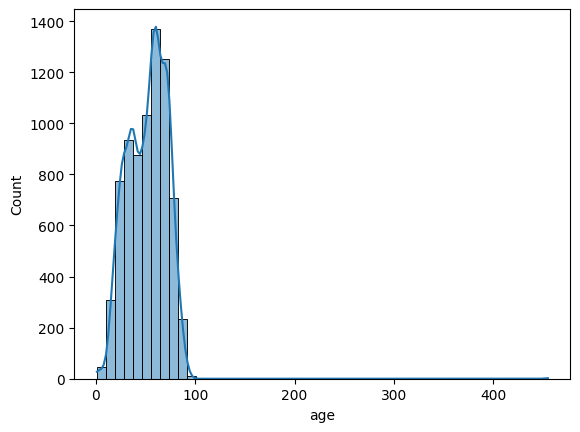

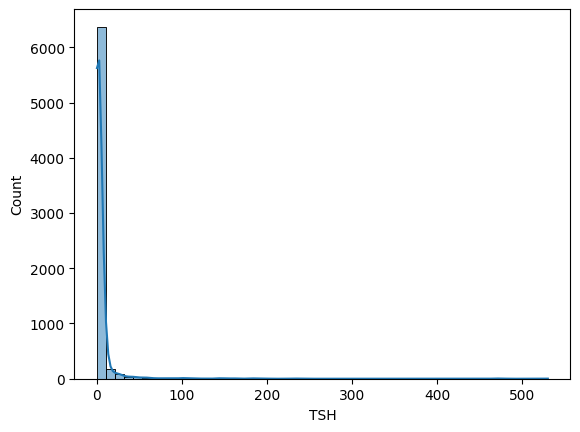

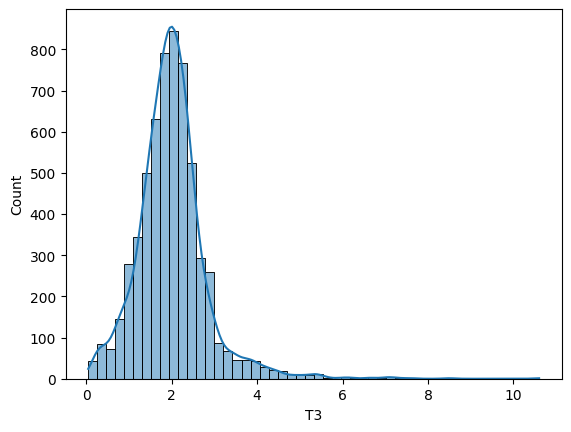

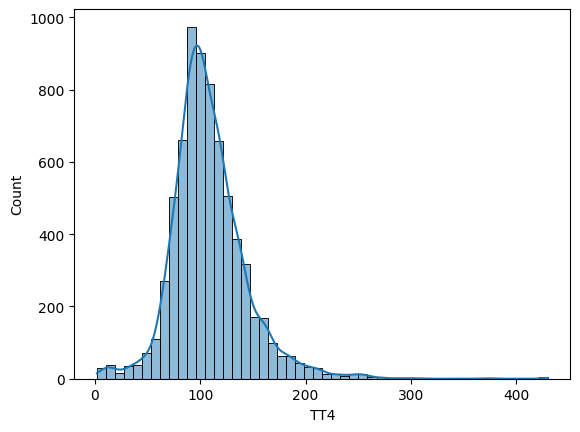

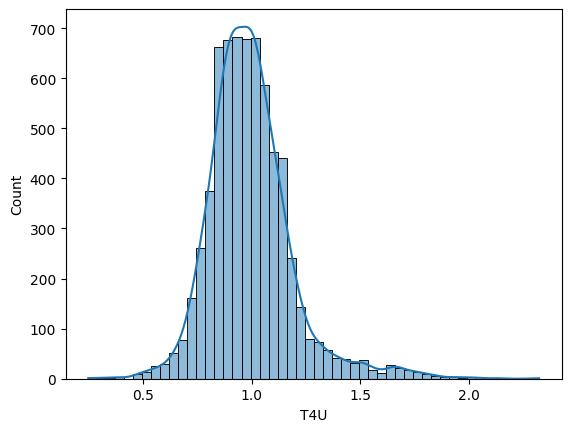

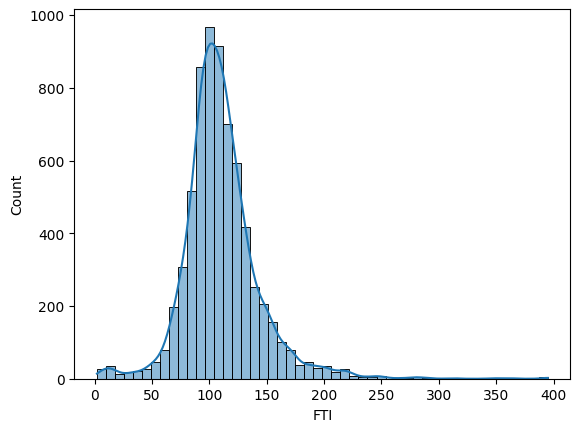

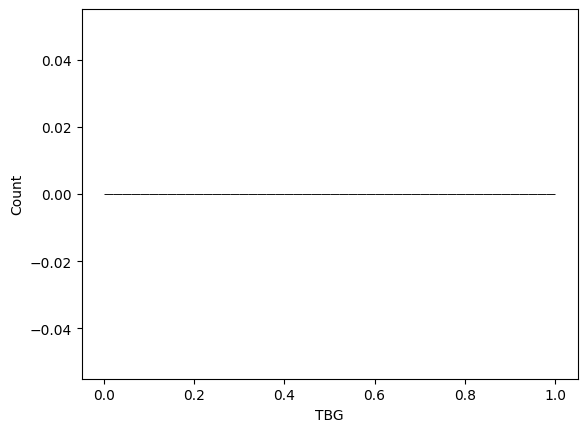

In [20]:
for features in num_features:
    sns.histplot(final_dataset[features],bins=50,kde=True)
    plt.show()

### 6.1 visualizing the correlation strength of each numerical feature

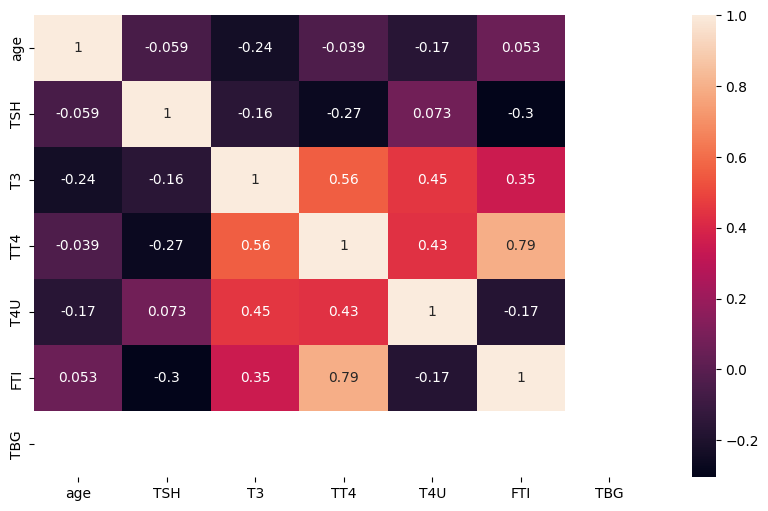

In [21]:
plt.subplots(figsize=(10,6))
sns.heatmap(final_dataset[num_features].corr(), annot=True)
plt.show()

###### Insights
- High correlation between FTI and TT4
- High correlation between T4U and TBG

### 6.2 Checking relation of disease feature with numerical features

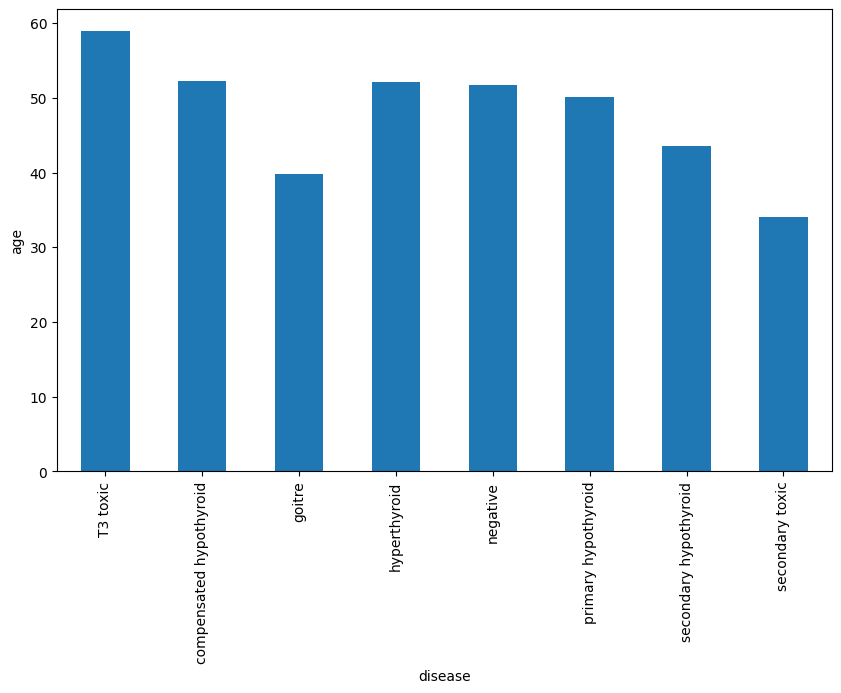

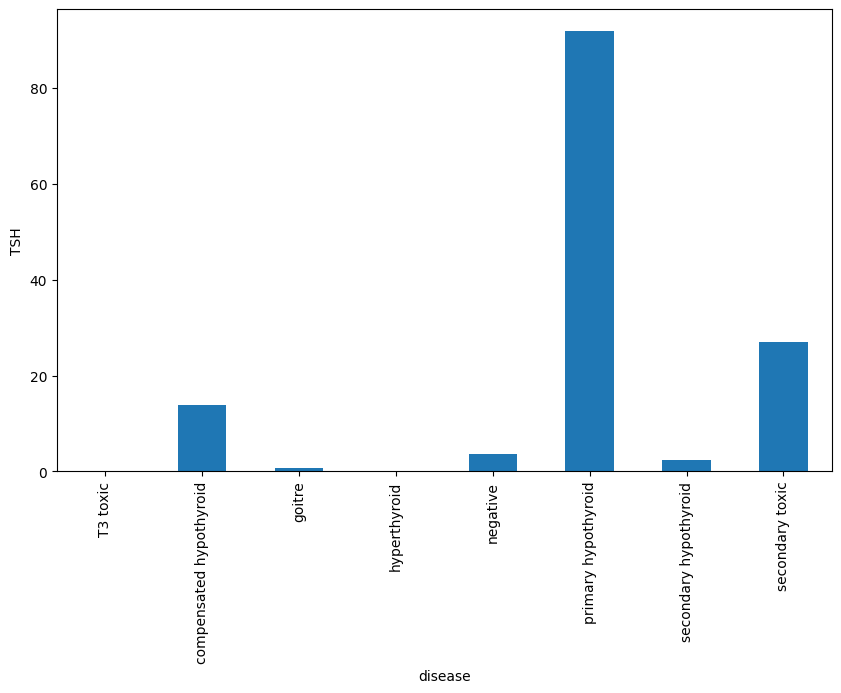

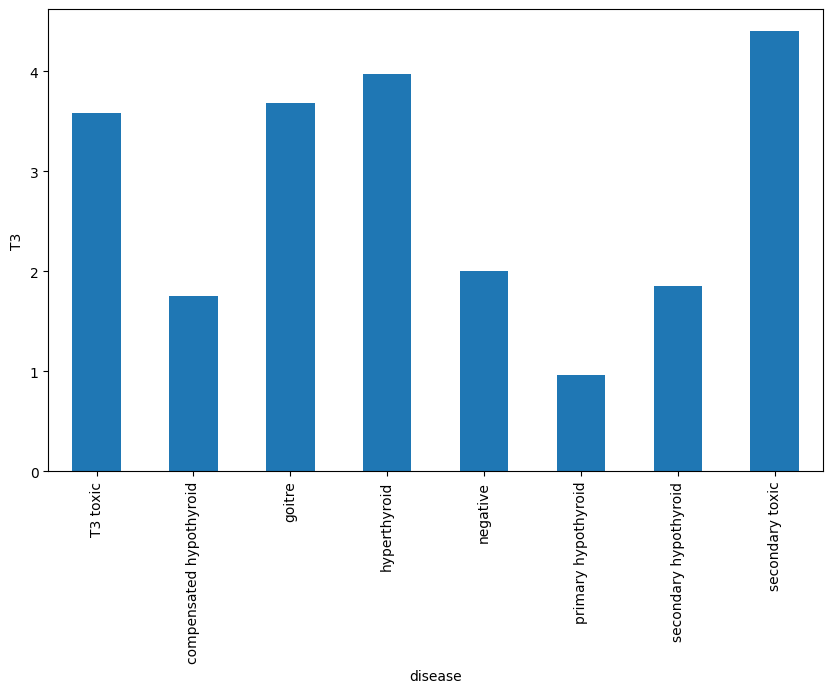

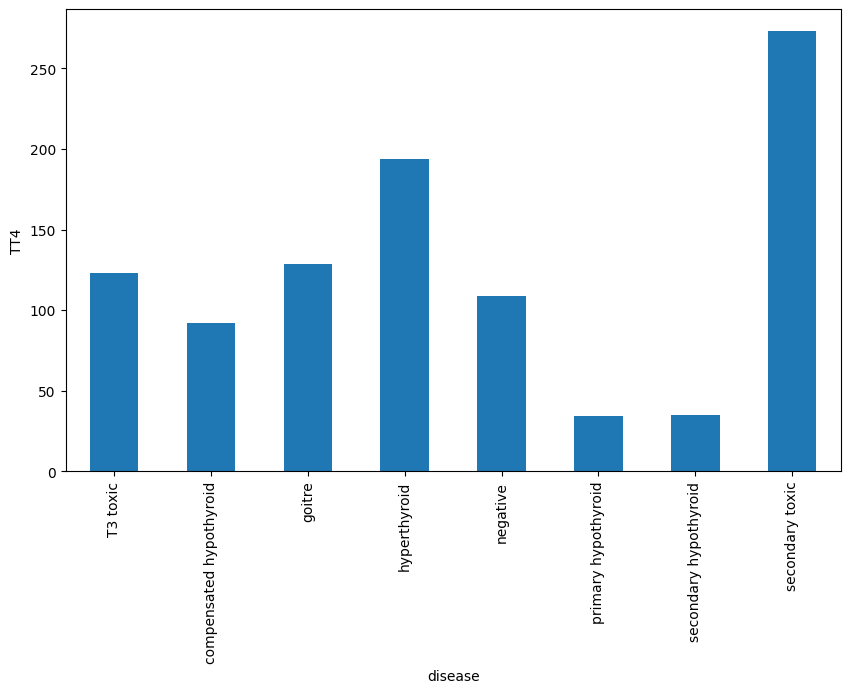

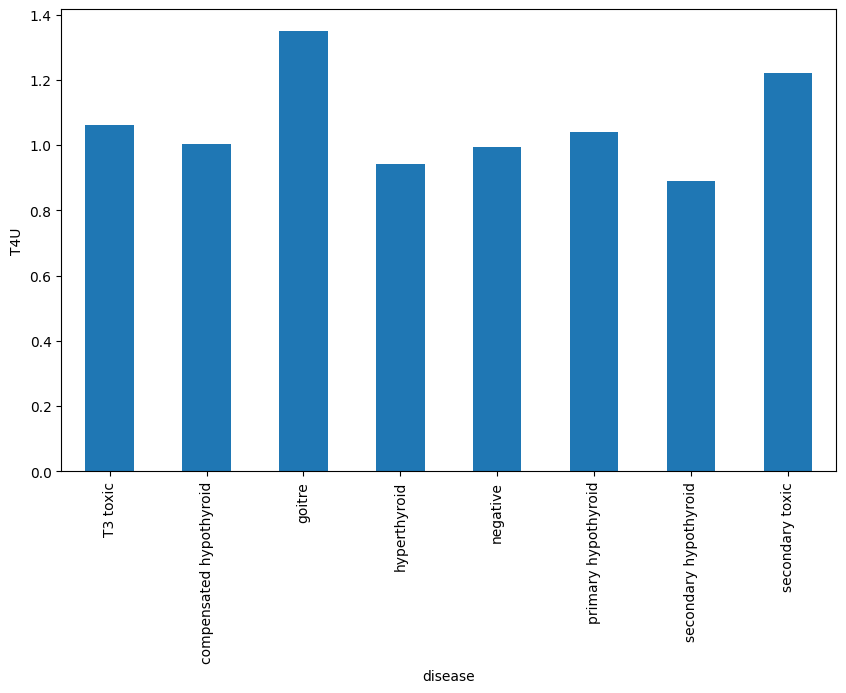

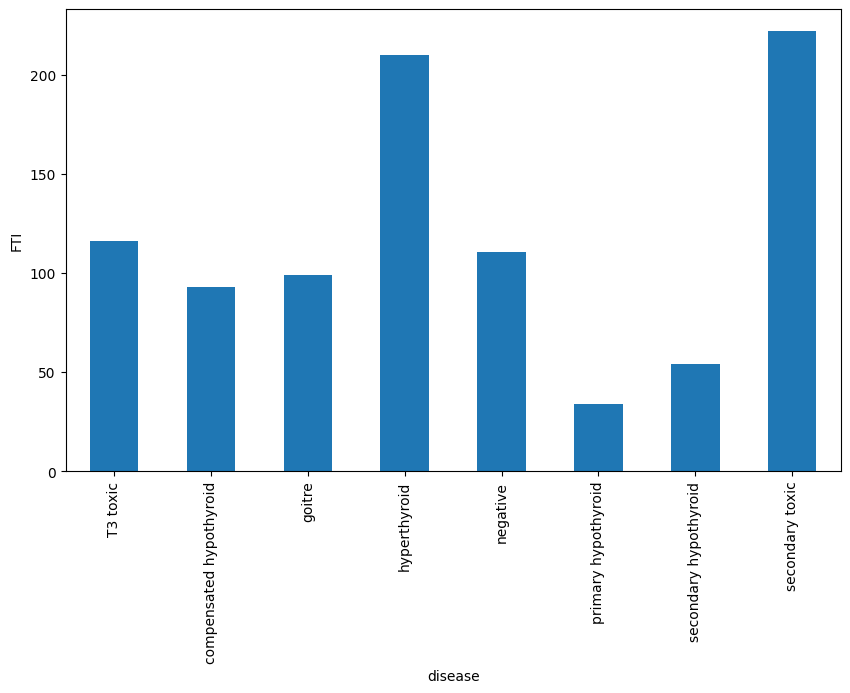

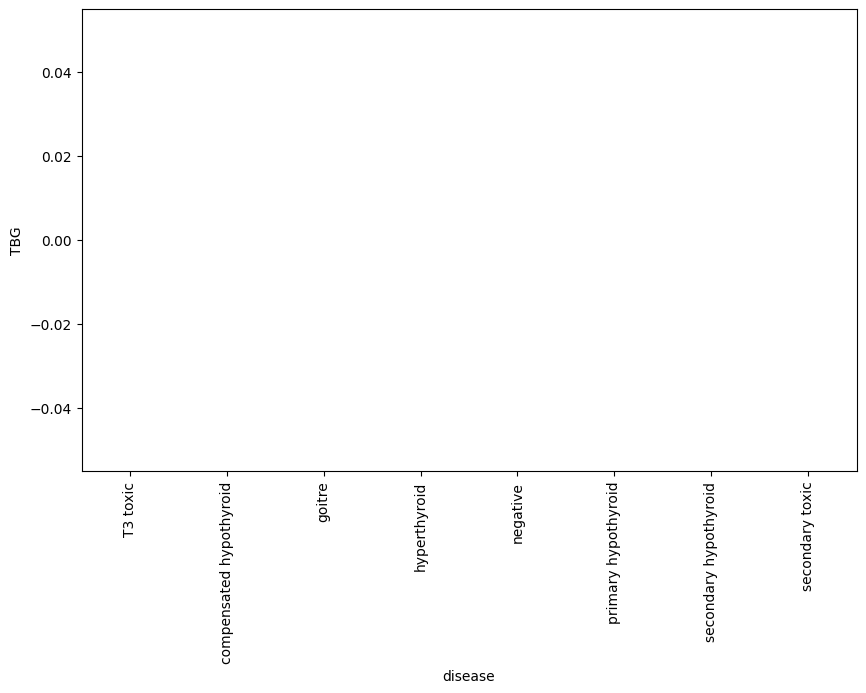

In [22]:
for features in num_features:
    temp=final_dataset.copy()
    plt.subplots(figsize=(10,6))
    temp.groupby('disease')[features].mean().plot.bar()
    plt.xlabel('disease')
    plt.ylabel(features)
    plt.show()

### 6.3 Checking outliers in numerical features

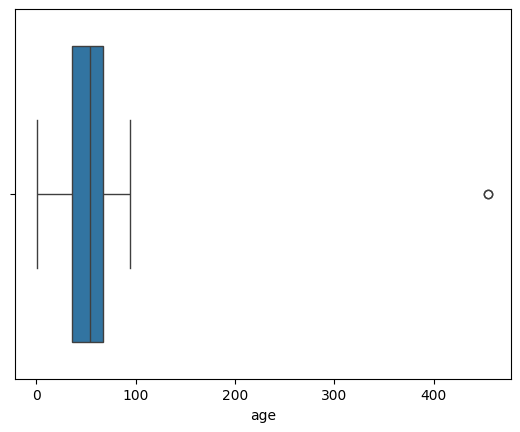

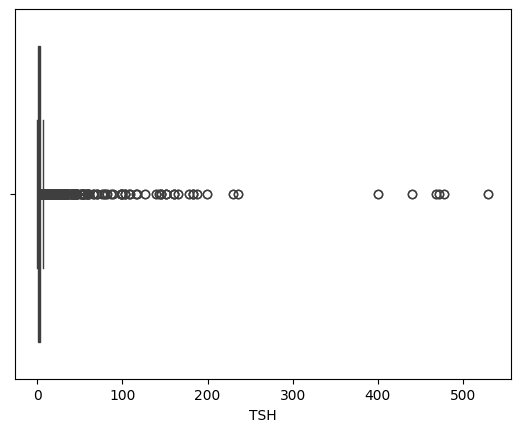

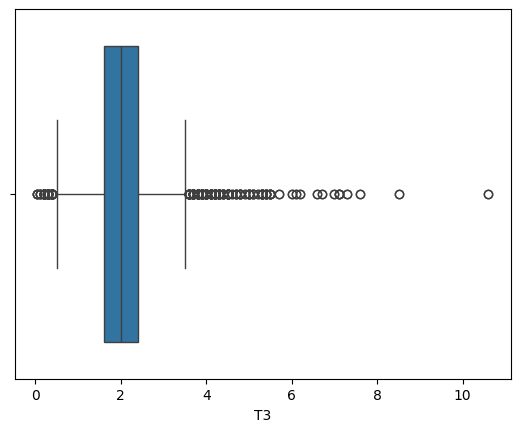

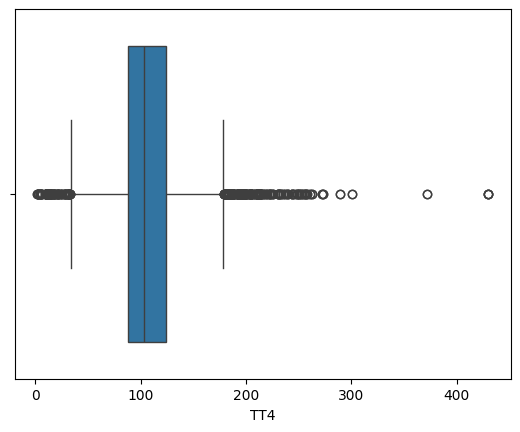

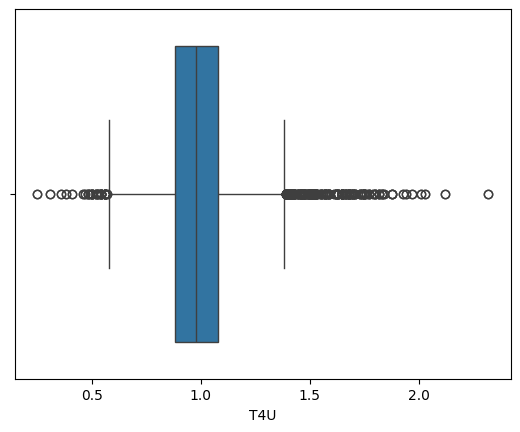

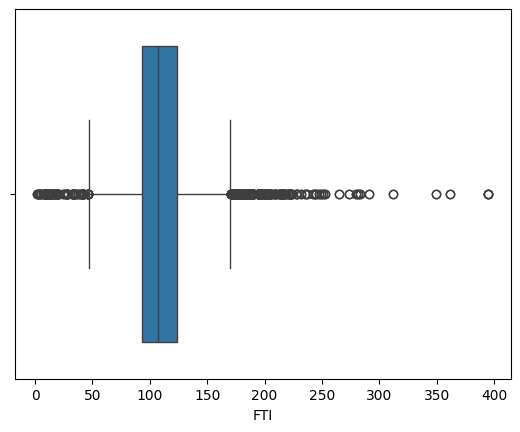

In [25]:
for features in num_features:
    if features!='TBG':
        sns.boxplot(final_dataset,x=final_dataset[features])
        plt.show()

### 6.4 Visualizing the correlation strength of boolean category features

In [27]:
bool_features=[features for features in final_dataset.columns if final_dataset[features].dtypes=='int64']

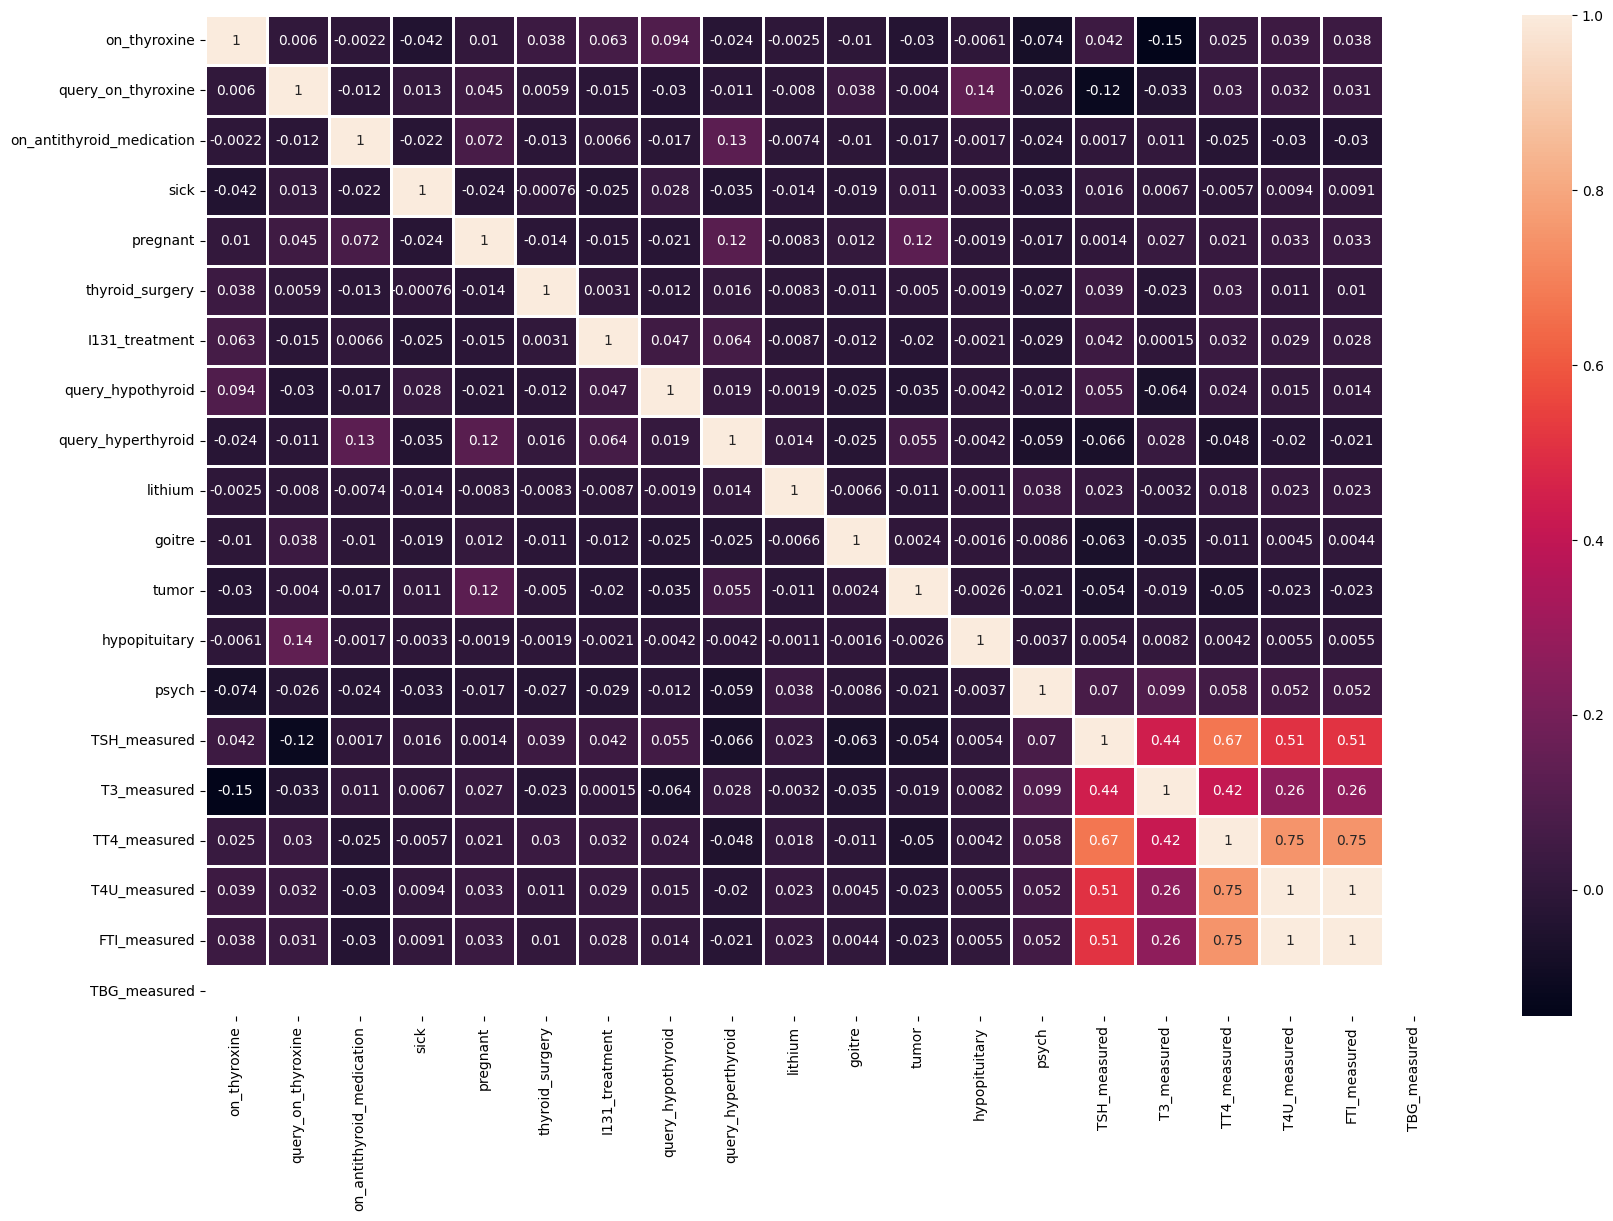

In [28]:
plt.subplots(figsize=(20,13))
sns.heatmap(final_dataset[bool_features].corr(),annot=True, linewidths=2)
plt.show()

###### Insights
- FTI_measured ,T4U_measured and TT4_measured has high correlation
- FTI_masured and T4U_measured has highly strong correlation

### Checking relation b/w 
### 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured' 
### and 
### 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'

In [29]:
measured_bool_features=[features for features in final_dataset.columns if '_measured' in features]

In [30]:
for features in measured_bool_features:
    print("Missing values:",final_dataset.loc[:,features.replace('_measured',"")].isnull().sum())
    print(features+": ")
    print(final_dataset[features].value_counts())

Missing values: 738
TSH_measured: 
TSH_measured
1    6806
0     738
Name: count, dtype: int64
Missing values: 1538
T3_measured: 
T3_measured
1    6006
0    1538
Name: count, dtype: int64
Missing values: 462
TT4_measured: 
TT4_measured
1    7082
0     462
Name: count, dtype: int64
Missing values: 774
T4U_measured: 
T4U_measured
1    6770
0     774
Name: count, dtype: int64
Missing values: 770
FTI_measured: 
FTI_measured
1    6774
0     770
Name: count, dtype: int64
Missing values: 7544
TBG_measured: 
TBG_measured
0    7544
Name: count, dtype: int64


#### Insight:
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')


- True value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents non-missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')

### 6.5 Bivariate analysis

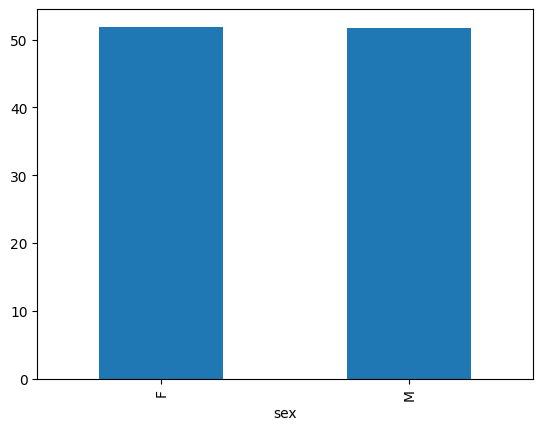

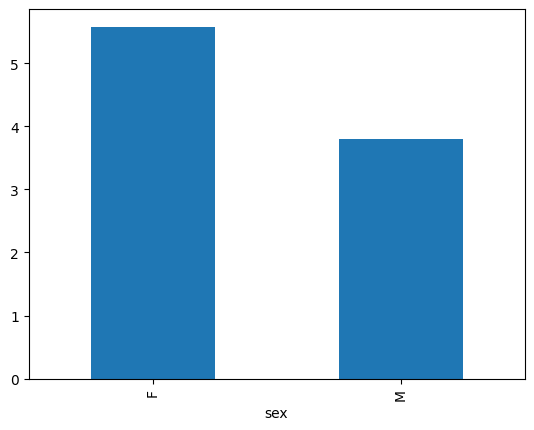

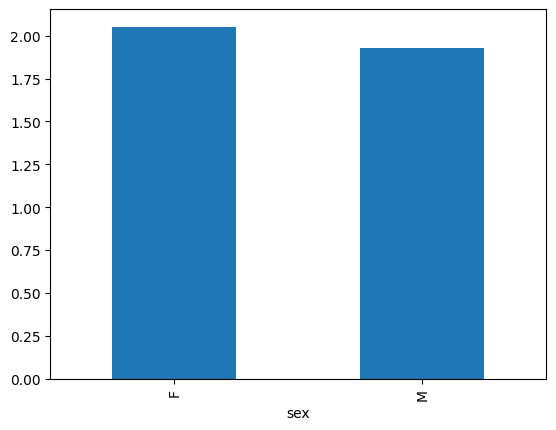

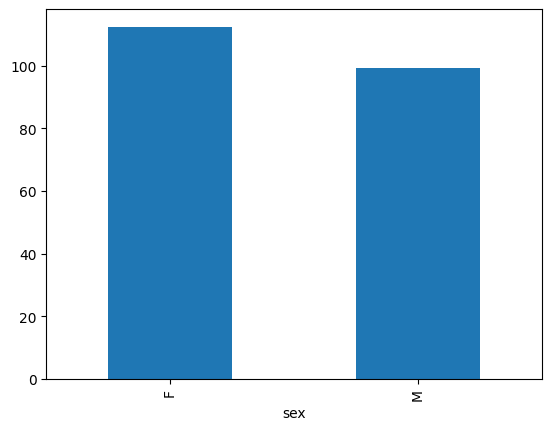

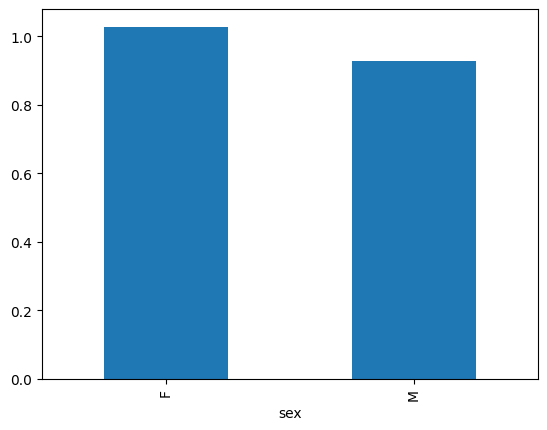

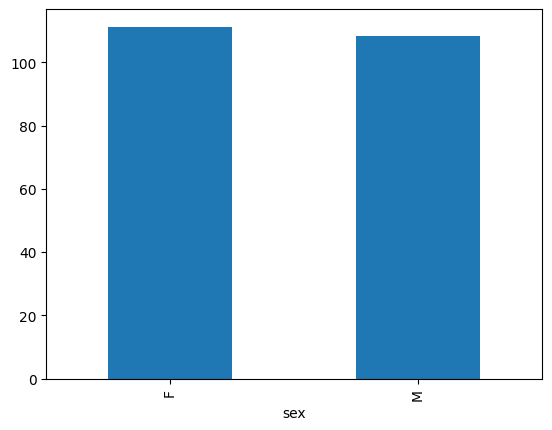

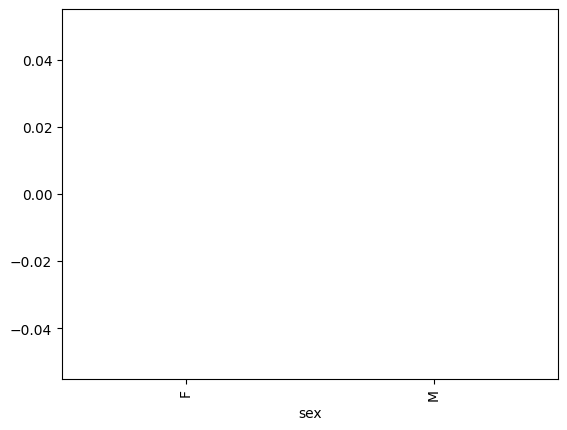

In [31]:
for features in num_features:
    temp=final_dataset.copy()
    temp.groupby('sex')[features].mean().plot.bar()
    plt.show()

### 6.6 Multivariate Analysis

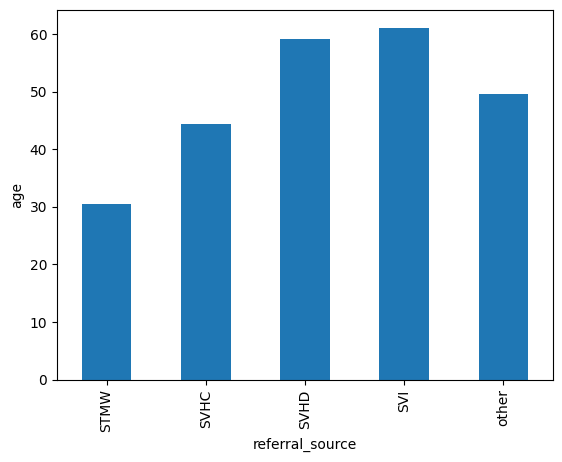

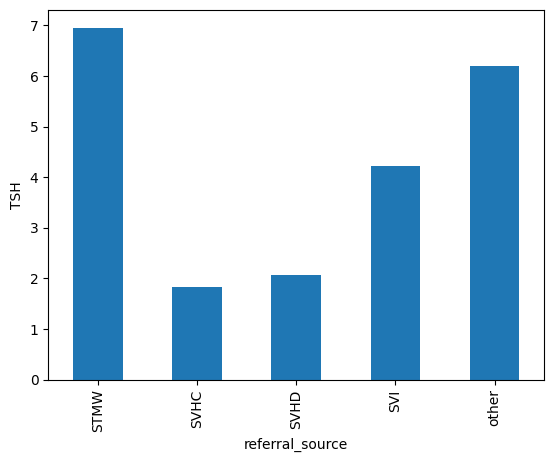

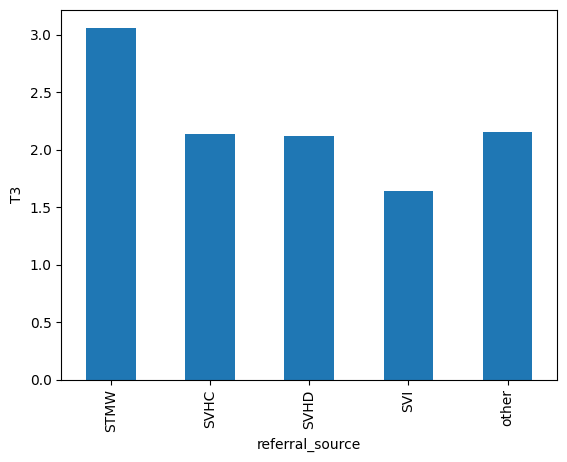

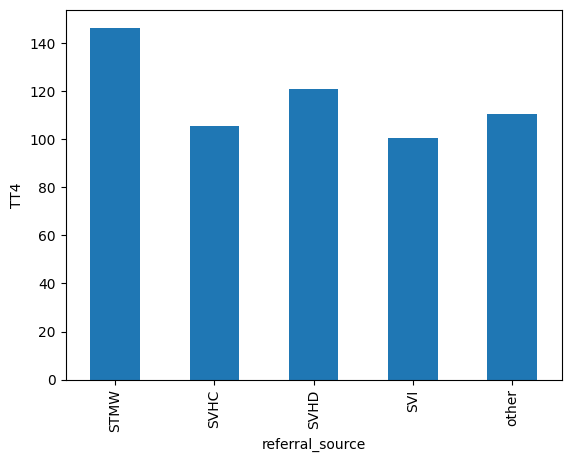

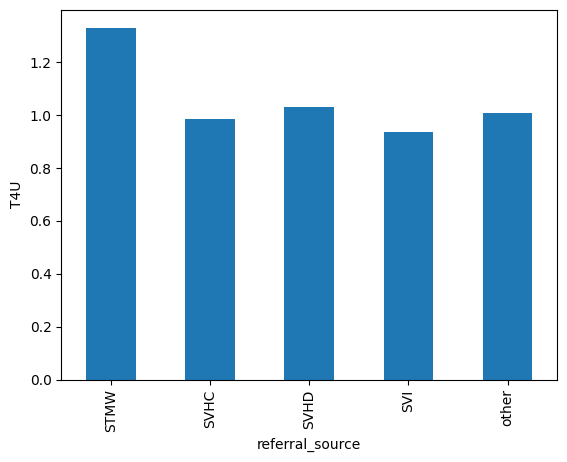

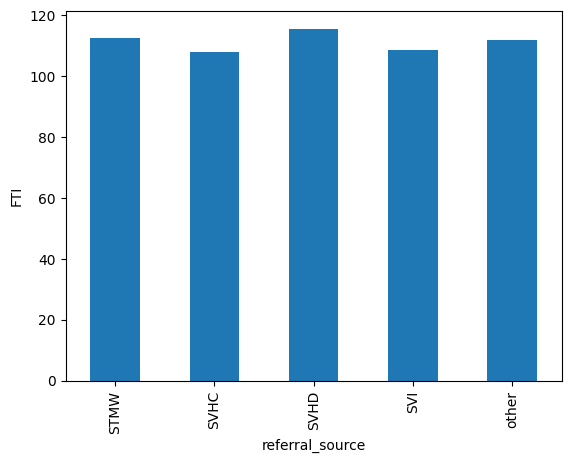

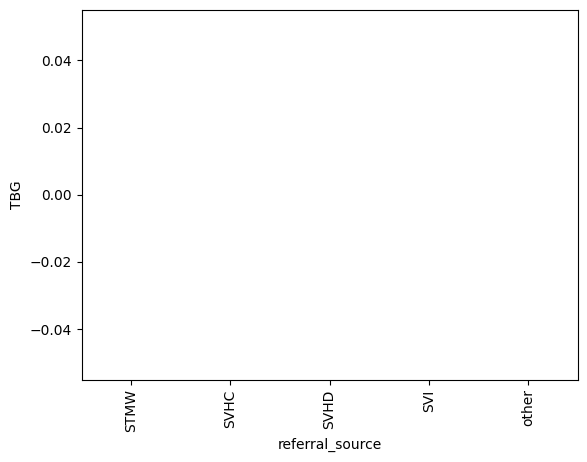

In [32]:
for features in num_features:
    temp=final_dataset.copy()
    temp.groupby('referral_source')[features].mean().plot.bar()
    plt.ylabel(features)
#     sns.barplot(x=final_dataset['referral_source'], y=final_dataset[features])
    plt.show()

### Conclusion:
- Disease features contains various classes which related to each other
- False value in ('TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured') represents missing values in ('TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG')
- Females has more occurence of disease as compared to Males

### Checking the affect of outlier on disease category classes

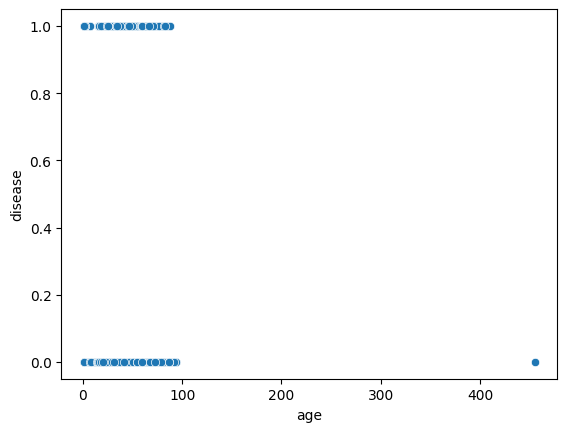

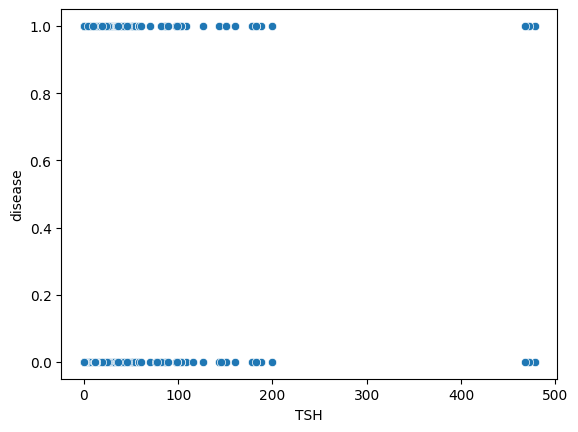

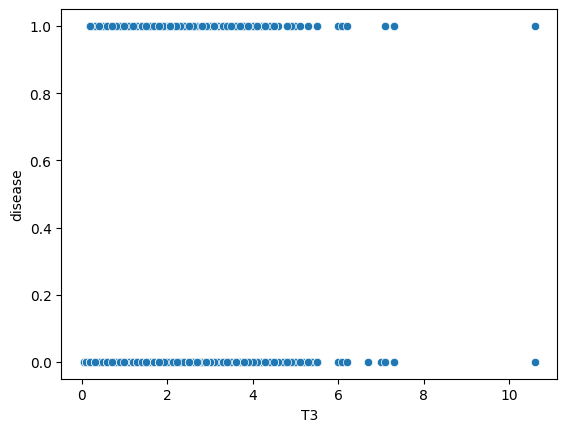

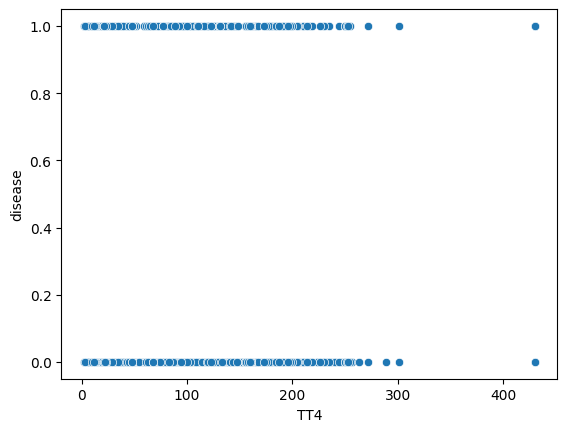

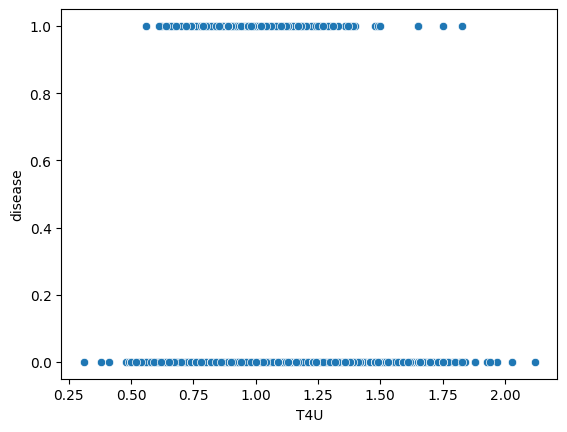

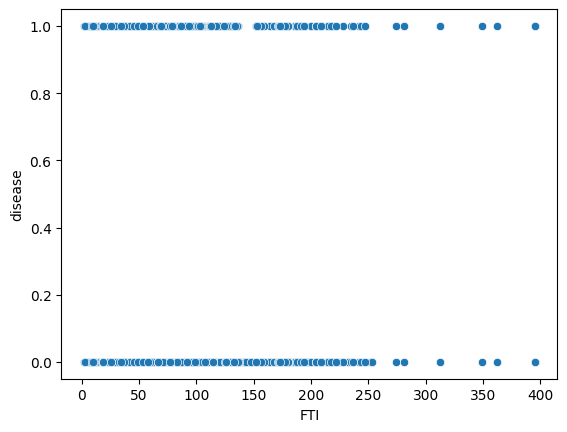

In [198]:
for features in num_features:
    sns.scatterplot(x=final_dataset[features], y=final_dataset['disease'])
    plt.show()

- All outliers may also useful in detection of disease category hence outlier removal is not necessary

In [199]:
final_dataset['disease'].value_counts()

disease
0    2753
1     297
Name: count, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

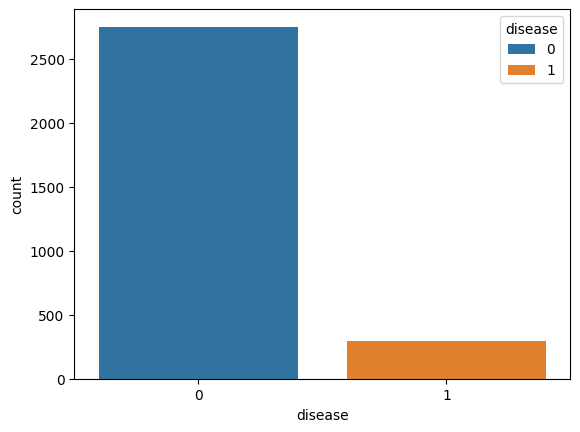

In [200]:
sns.countplot(data=final_dataset,x=final_dataset['disease'],hue='disease')